<a href="https://colab.research.google.com/github/rachit-shah/adbi-project/blob/master/HAN_dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data and Glove Model From Drive

In [1]:
# Mounting google drive to access data and glove model
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#import all required packages and modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import nltk
nltk.download('popular')

from keras.preprocessing.text import Tokenizer,text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D, Dropout, LSTM, GRU, Bidirectional, SpatialDropout1D, TimeDistributed
from keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.models import Model
from keras.initializers import Constant

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text 
from wordcloud import WordCloud, STOPWORDS

from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

import nltk.corpus
import string
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer

from keras.layers import Embedding

import time
from keras.models import model_from_json
from sklearn.datasets import fetch_20newsgroups

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Using TensorFlow backend.


In [3]:
# copying dataset and embedding from drive. Unpacking the compressed files
#!cp gdrive/'My Drive'/bbc-fulltext.zip .
!cp gdrive/'My Drive'/glove.6B.zip .
#!unzip bbc-fulltext.zip > out.txt
#!rm bbc/README.TXT
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
# from https://stackoverflow.com/questions/32419510/how-to-get-reproducible-results-in-keras
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 123

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)


# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)


In [5]:
#Read Data
'''
categories = ['business','entertainment','politics','sport','tech']
df = pd.DataFrame([],columns=['category','id','text'])
for cat in categories:
  for file in os.listdir("bbc/"+cat):
      if file.endswith(".txt"):
          filepath = os.path.join("bbc/"+cat, file)
          text = open(filepath,'r', errors='ignore').read()
          s = pd.Series([cat,int(filepath.split('/')[-1][:-4]),text],index=['category','id','text'])
          df = df.append(s,ignore_index=True)

df.head()
'''
data = fetch_20newsgroups(subset='train')
test_data = fetch_20newsgroups(subset='test')

In [6]:
'''
#WordCloud
cat = df['category'].unique()

for i in range(0,len(cat)):
    words = ' '.join(df.loc[df['category']==cat[i], 'text'])

    wordcloud = WordCloud( 
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=800,
                          height=400
                ).generate(words)
    print(cat[i])
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

words = ' '.join(df.loc[:, 'text'])

wordcloud = WordCloud( 
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=800,
                      height=400
            ).generate(words)
print("ALL Categories:")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
'''

'\n#WordCloud\ncat = df[\'category\'].unique()\n\nfor i in range(0,len(cat)):\n    words = \' \'.join(df.loc[df[\'category\']==cat[i], \'text\'])\n\n    wordcloud = WordCloud( \n                          stopwords=STOPWORDS,\n                          background_color=\'white\',\n                          width=800,\n                          height=400\n                ).generate(words)\n    print(cat[i])\n    plt.figure(figsize=(10, 5))\n    plt.imshow(wordcloud)\n    plt.axis(\'off\')\n    plt.show()\n\nwords = \' \'.join(df.loc[:, \'text\'])\n\nwordcloud = WordCloud( \n                      stopwords=STOPWORDS,\n                      background_color=\'white\',\n                      width=800,\n                      height=400\n            ).generate(words)\nprint("ALL Categories:")\nplt.figure(figsize=(10, 5))\nplt.imshow(wordcloud)\nplt.axis(\'off\')\nplt.show()\n'

## Split Data

In [0]:
y_train = data.target
X_train = pd.DataFrame({'text':data.data})
X_test = pd.DataFrame({'text':test_data.data})
y_test = test_data.target


In [8]:
#Map label name to its index
labels_index = {}
for i in range(len(test_data.target_names)):
  labels_index[test_data.target_names[i]] = i

labels_index

{'alt.atheism': 0,
 'comp.graphics': 1,
 'comp.os.ms-windows.misc': 2,
 'comp.sys.ibm.pc.hardware': 3,
 'comp.sys.mac.hardware': 4,
 'comp.windows.x': 5,
 'misc.forsale': 6,
 'rec.autos': 7,
 'rec.motorcycles': 8,
 'rec.sport.baseball': 9,
 'rec.sport.hockey': 10,
 'sci.crypt': 11,
 'sci.electronics': 12,
 'sci.med': 13,
 'sci.space': 14,
 'soc.religion.christian': 15,
 'talk.politics.guns': 16,
 'talk.politics.mideast': 17,
 'talk.politics.misc': 18,
 'talk.religion.misc': 19}

## Preprocess Data - (split by \n, remove periods, remove slashes)

### HAN requires the data to be 3D instead of 2D like in CNN or RNN. i.e, we will generate data as list of sentences which are list of words

In [0]:
#Parameters for hyperparameter  tuning
dropout = 0.3
EMBEDDING_DIM = 300
traina = True #embeedding layer trainable

In [0]:
def preprocess(X):
  return X.map(lambda x: x.lower().split("\n")).map(lambda x: [y.split(". ") for y in x]).map(lambda x: [i.replace('\'','') for sl in x for i in sl if i is not ''])

In [0]:
#Preprocess both train and test separately. Remove punctuations and other unwanted characters
def replace_punct(st,punct):
  for i in punct:
    if i=="..":
      st = st.replace("..",'.')
    elif i=="--" or i == '-':
      st = st.replace(i,' ')
    else:
      st = st.replace(i,'')
  return st
punct = word_tokenize(string.punctuation) + ['``','...','..','\'s','--','-','n\'t','\'','(',')','[',']','{','}']
texts = preprocess(X_train['text']).map(lambda x: '. '.join(x)).map(lambda x: replace_punct(x,punct))
test_text = preprocess(X_test['text']).map(lambda x: '. '.join(x)).map(lambda x: replace_punct(x,punct))

In [0]:
#Get all sentences for all news
articles = texts.map(lambda x: sent_tokenize(x))
test_articles = test_text.map(lambda x: sent_tokenize(x))

{'boxes': [<matplotlib.lines.Line2D at 0x7f4357ea1160>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4357ea1978>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4357eb5390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4357eb5048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4357ea12b0>,
  <matplotlib.lines.Line2D at 0x7f4357ea1630>]}

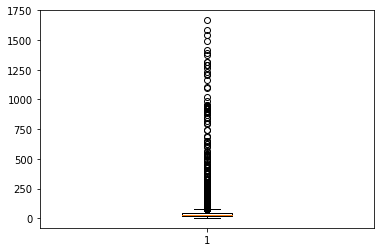

In [13]:
#Find the optimum sentence length and number of sentences for tokenization by generating a boxplot
# and choosing MAX_SENTS and MAX_SENT_LENGTH such that we remove outliers
max_se = []
max_se_length = []
for x in articles:
  max_se.append(len(x))
  for y in x:
    max_se_length.append(len(y.split()))
  
plt.boxplot(max_se,showcaps=True)
# We can see in below plot that optimal number of sentences is around 50

In [14]:
np.quantile(max_se, 0.97)

142.61000000000058

{'boxes': [<matplotlib.lines.Line2D at 0x7f4357e36160>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4357e36978>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4357e3f390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4357e3f048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4357e362b0>,
  <matplotlib.lines.Line2D at 0x7f4357e36630>]}

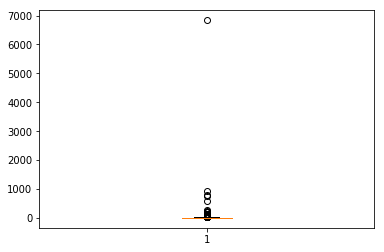

In [15]:
plt.boxplot(max_se_length,showcaps=True)
# We can see in below plot that optimal sentence length is around 50

In [16]:
np.quantile(max_se_length, 0.97)

15.0

In [17]:
#Choose parameters accordingly and load glove model corresponding to the embedding dimension that was the best in hyperparameter tuning
MAX_SEQUENCE_LENGTH = 1000
MAX_SENT_LENGTH = 15
MAX_SENTS = 143
MAX_NB_WORDS = 20000
VALIDATION_SPLIT = 0.2
embeddings_index = {}
with open('glove.6B.'+str(EMBEDDING_DIM)+'d.txt') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [18]:
#Create 3D data with tokenizer word_index. Neglect words which are not in word_index
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)

data = np.zeros((len(texts), MAX_SENTS, MAX_SENT_LENGTH), dtype='int32')

for i, sentences in enumerate(articles):
    for j, sent in enumerate(sentences):
        if j< MAX_SENTS:
            wordTokens = text_to_word_sequence(sent)
            k=0
            for _, word in enumerate(wordTokens):
                if k<MAX_SENT_LENGTH and tokenizer.word_index[word]<MAX_NB_WORDS:
                    data[i,j,k] = tokenizer.word_index[word]
                    k=k+1
                    
word_index = tokenizer.word_index
print('No. of %s unique tokens.' % len(word_index))

No. of 151845 unique tokens.


In [0]:
#Do the same for test data with the same tokenizer (fit on train data). Neglect words which are not in word_index
test_data = np.zeros((len(test_text), MAX_SENTS, MAX_SENT_LENGTH), dtype='int32')

for i, sentences in enumerate(test_articles):
    for j, sent in enumerate(sentences):
        if j< MAX_SENTS:
            wordTokens = text_to_word_sequence(sent)
            k=0
            for _, word in enumerate(wordTokens):
                if k<MAX_SENT_LENGTH and word in tokenizer.word_index and tokenizer.word_index[word]<MAX_NB_WORDS:
                    test_data[i,j,k] = tokenizer.word_index[word]
                    k=k+1

In [20]:
test_data.shape

(7532, 143, 15)

In [21]:
#Split training and validation data with 20% split. So final is training 64%, validation 16% and test 20% of whole data
labels = to_categorical(np.asarray(y_train))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

np.random.seed(123)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

xtrain = data[:-nb_validation_samples]
ytrain = labels[:-nb_validation_samples]
xval = data[-nb_validation_samples:]
yval = labels[-nb_validation_samples:]

Shape of data tensor: (11314, 143, 15)
Shape of label tensor: (11314, 20)


In [22]:
'''
#Stop Words and Lemmatization   
lemmatizer = WordNetLemmatizer()
stopw = nltk.corpus.stopwords.words('english')
punct = string.punctuation
punct = word_tokenize(punct)
punct += ['.','``','...','\'s','--','-','n\'t','\'']
stopw += punct
def token_stop(text):
    global stopw
    global lemmatizer
    words = word_tokenize(text)
    filtered = [lemmatizer.lemmatize(w) for w in words if not w in stopw]
    return filtered
  
X_train['text'] = X_train['text'].map(lambda x: [token_stop(i) for i in x]).map(lambda x: [i for sl in x for i in sl])
X_test['text'] = X_test['text'].map(lambda x: [token_stop(i) for i in x]).map(lambda x: [i for sl in x for i in sl])
'''

"\n#Stop Words and Lemmatization   \nlemmatizer = WordNetLemmatizer()\nstopw = nltk.corpus.stopwords.words('english')\npunct = string.punctuation\npunct = word_tokenize(punct)\npunct += ['.','``','...',''s','--','-','n't',''']\nstopw += punct\ndef token_stop(text):\n    global stopw\n    global lemmatizer\n    words = word_tokenize(text)\n    filtered = [lemmatizer.lemmatize(w) for w in words if not w in stopw]\n    return filtered\n  \nX_train['text'] = X_train['text'].map(lambda x: [token_stop(i) for i in x]).map(lambda x: [i for sl in x for i in sl])\nX_test['text'] = X_test['text'].map(lambda x: [token_stop(i) for i in x]).map(lambda x: [i for sl in x for i in sl])\n"

In [0]:
#Create glove embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

## Train Model

In [0]:
#Keras Glove Embedding layer
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SENT_LENGTH,
                            trainable=traina)

In [0]:
#Callbacks - checkpointer, early stopping and tensorboard
model_name = "HAN-"+'d2-'+str(dropout)+"-"+str(EMBEDDING_DIM)+"-Trainable-"+str(traina)
checkpointer = ModelCheckpoint(model_name + "_weights.{epoch:02d}-{val_loss:.2f}.hdf5", monitor="val_loss", verbose=1,
                               save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
tensorboard_han = TensorBoard(log_dir='./Graph_HAN', histogram_freq=1,write_graph=True,write_grads=True, write_images=True)

In [26]:
#Model Architecture
sentence_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sentence_input)
lstm_layer = Bidirectional(LSTM(100,dropout=dropout))(embedded_sequences)
sentEncoder = Model(sentence_input, lstm_layer)

article_input = Input(shape=(MAX_SENTS,MAX_SENT_LENGTH), dtype='int32')
article_encoder = TimeDistributed(sentEncoder)(article_input)
lstm_layer_sent = Bidirectional(LSTM(100,dropout=dropout))(article_encoder)
preds = Dense(len(labels_index), activation='softmax')(lstm_layer_sent)
han_model = Model(article_input, preds)

han_model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
han_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 143, 15)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 143, 200)          45874600  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               240800    
_________________________________________________________________
dense_1 (Dense)              (None, 20)                4020      
Total params: 46,119,420
Trainable params: 46,119,420
Non-trainable params: 0
_________________________________________________________________


In [27]:
#Train Model
stmillis = int(round(time.time() * 1000))
history = han_model.fit(xtrain, ytrain, validation_data=(xval, yval),
          epochs=50, batch_size=128, callbacks=[checkpointer, early_stopping])
endmillis = int(round(time.time() * 1000))
print("Time taken: ", endmillis - stmillis)

Instructions for updating:
Use tf.cast instead.
Train on 9052 samples, validate on 2262 samples
Epoch 1/50
9052/9052 [==============================] - 78s 9ms/step - loss: 2.4219 - acc: 0.2361 - val_loss: 1.7725 - val_acc: 0.4328

Epoch 00001: val_loss improved from inf to 1.77250, saving model to HAN-d2-0.3-300-Trainable-True_weights.01-1.77.hdf5
Epoch 2/50
9052/9052 [==============================] - 74s 8ms/step - loss: 1.3256 - acc: 0.5591 - val_loss: 1.0132 - val_acc: 0.6525

Epoch 00002: val_loss improved from 1.77250 to 1.01319, saving model to HAN-d2-0.3-300-Trainable-True_weights.02-1.01.hdf5
Epoch 3/50
9052/9052 [==============================] - 75s 8ms/step - loss: 0.8165 - acc: 0.7290 - val_loss: 0.6421 - val_acc: 0.8002

Epoch 00003: val_loss improved from 1.01319 to 0.64205, saving model to HAN-d2-0.3-300-Trainable-True_weights.03-0.64.hdf5
Epoch 4/50
9052/9052 [==============================] - 74s 8ms/step - loss: 0.5520 - acc: 0.8237 - val_loss: 0.5845 - val_acc: 0.8

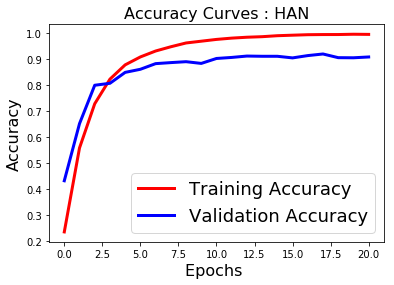

In [28]:
#Plot accuracy curve
fig=plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : HAN',fontsize=16)
fig.savefig(model_name+'-ACC'+'.png')
plt.show()

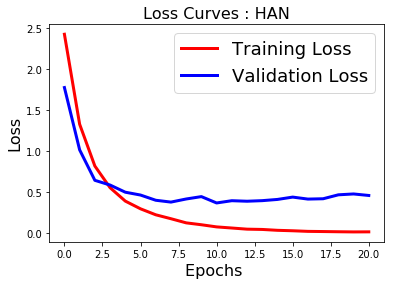

In [29]:
#Plot loss curve
fig=plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves : HAN',fontsize=16)
fig.savefig(model_name+'.png')
plt.show()

In [30]:
model_name

'HAN-d2-0.3-300-Trainable-True'

In [0]:
# Save the trained weights
han_model.save(model_name + ".h5")

# Save model config as json
model_json = han_model.to_json()
with open(model_name + ".json", "w") as json_file:
    json_file.write(model_json)

# Persist the model to your google drive [VERY IMPORTANT]
!cp HAN* gdrive/My\ Drive/

## Predict on Test Data

In [0]:
#Load the weights of the model which had the best validation loss
best_model_weights = 'HAN-d2-0.3-300-Trainable-True_weights.11-0.37.hdf5'
!cp gdrive/My\ Drive/HAN-d2-0.3-300-Trainable-True_weights.11-0.37.hdf5 .
!cp gdrive/My\ Drive/HAN-d2-0.3-300-Trainable-True.json .

In [0]:
json_file = open('HAN-d2-0.3-300-Trainable-True.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
best_model = model_from_json(loaded_model_json)

In [0]:
best_model.load_weights(best_model_weights)
best_model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])


In [0]:
def find_test_acc(prediction):
  count = 0
  t = 0
  for pred in prediction:
    p = pred.argmax()
    #name = le.inverse_transform([p])
    if p == y_test[count]:
      t+=1
    count+=1
  print('Test Accuracy:',(t/count)*100,"%")

In [0]:
def predict_test(model):
  prediction = model.predict(test_data)
  find_test_acc(prediction)

In [37]:
#Final test accuracy on the best model
predict_test(best_model)

Test Accuracy: 83.40414232607542 %


## Tensorboard

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-05-02 23:32:30--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.206.36.121, 52.22.236.254, 34.206.130.40, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.206.36.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14991793 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  14.30M  41.4MB/s    in 0.3s    

2019-05-02 23:32:30 (41.4 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [14991793/14991793]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = './Graph_HAN'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://e8c26071.ngrok.io


In [0]:
!cp -r ./Graph_HAN gdrive/My\ Drive/.

In [0]:
!ls

accuracy_cnn.png	  HAN_weights.08-0.25.hdf5
bbc			  HAN_weights.08-1.18.hdf5
bbc-fulltext.zip	  HAN_weights.09-0.17.hdf5
gdrive			  HAN_weights.09-1.14.hdf5
glove.6B.100d.txt	  HAN_weights.11-0.16.hdf5
glove.6B.200d.txt	  HAN_weights.11-0.22.hdf5
glove.6B.300d.txt	  HAN_weights.11-1.12.hdf5
glove.6B.50d.txt	  HAN_weights.12-0.15.hdf5
glove.6B.zip		  HAN_weights.12-0.19.hdf5
HAN.h5			  HAN_weights.12-1.10.hdf5
HAN.json		  HAN_weights.13-0.13.hdf5
HAN_weights.01-0.82.hdf5  HAN_weights.13-0.15.hdf5
HAN_weights.01-0.92.hdf5  HAN_weights.14-0.12.hdf5
HAN_weights.01-0.95.hdf5  HAN_weights.14-0.13.hdf5
HAN_weights.01-1.61.hdf5  HAN_weights.16-0.13.hdf5
HAN_weights.02-0.45.hdf5  HAN_weights.16-1.02.hdf5
HAN_weights.02-0.47.hdf5  HAN_weights.19-0.92.hdf5
HAN_weights.02-0.58.hdf5  HAN_weights.23-0.12.hdf5
HAN_weights.02-1.59.hdf5  HAN_weights.23-0.91.hdf5
HAN_weights.03-0.53.hdf5  HAN_weights.24-0.10.hdf5
HAN_weights.04-0.32.hdf5  HAN_weights.25-0.10.hdf5
HAN_weights.04-0.44.hdf5  HAN_weights.30

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(best_model, to_file='han_model.png', show_shapes=True, show_layer_names=True)

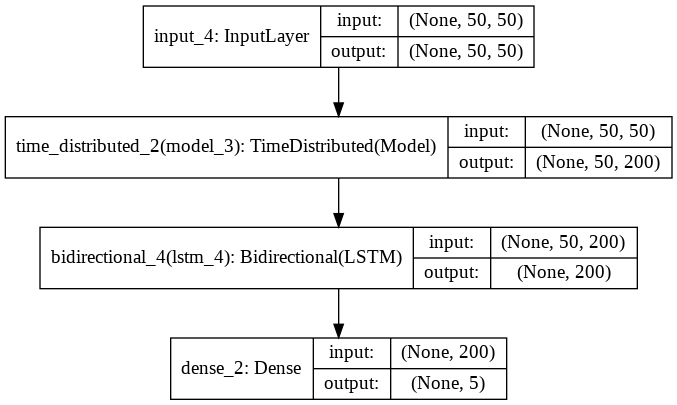

In [0]:
from PIL import Image
display(Image.open('han_model.png'))